In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
train= pd.read_csv("train.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='ApplicantIncome'>

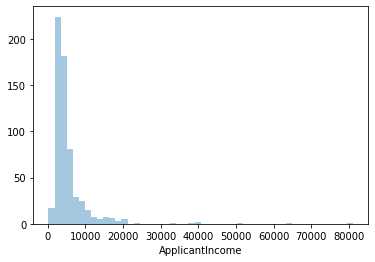

In [5]:
sns.distplot(train.ApplicantIncome,kde=False)

The distribution is skewed, Few outliers noted

<AxesSubplot:xlabel='ApplicantIncome'>

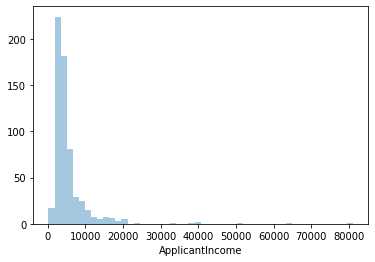

In [6]:
sns.distplot(train.ApplicantIncome.dropna(),kde=False)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

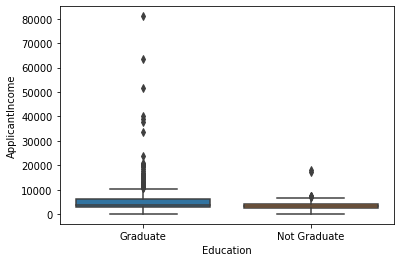

In [7]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

people with better education have better income

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#Loan Status into Binary
modified=train
modified ['Loan_Status'] = train['Loan_Status'].apply(lambda x:0 if x=="N" else 1)
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Treating missing values in Numerical columns and Categorical

In [11]:
#categorical 
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [12]:
#handling outliers using log transform

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Loan_Status             1.00
dtype: float64


In [13]:
print(train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))

     ApplicantIncome  CoapplicantIncome  Credit_History  Dependents  \
0              False              False           False       False   
1              False              False           False       False   
2              False              False           False       False   
3              False              False           False       False   
4              False              False           False       False   
..               ...                ...             ...         ...   
609            False              False           False       False   
610            False              False           False       False   
611            False              False           False       False   
612            False              False           False       False   
613            False              False            True       False   

     Education  Gender  LoanAmount  Loan_Amount_Term  Loan_ID  Loan_Status  \
0        False   False       False             False    False        

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [63]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['TotalIncome']= train['ApplicantIncome']+train['CoapplicantIncome'] 
train['TotalIncome_log']=np.log(train['TotalIncome'])


<AxesSubplot:xlabel='LoanAmount_log'>

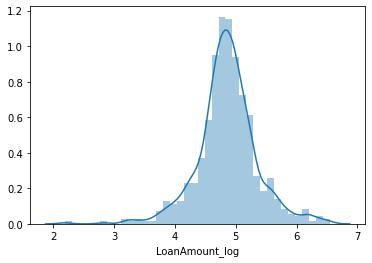

In [64]:
sns.distplot(train.LoanAmount_log)

Modeling


In [65]:
#Turning Categorical Variables
from sklearn.preprocessing import LabelEncoder
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder = LabelEncoder()
for i in category:
    train[i]=encoder.fit_transform(train[i])
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [88]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
     #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = [] 
    for train, test in kf.split(data[predictors]):
         # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
         # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    

               
  
 

In [89]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


In [90]:
model = DecisionTreeClassifier() 
predictor_var = ['Credit_History','Gender','Married','Education'] 
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


In [91]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 76.423%
Cross-Validation Score : 73.984%
Cross-Validation Score : 76.423%
Cross-Validation Score : 77.236%
Cross-Validation Score : 77.690%
